In [55]:
# imports
from __future__ import print_function
import keras, random
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [9]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Preprocessing
## Explain the data pre-processing high-lighted in the notebook

Each pixel is in the range of (0,255) and we are converting that to (0,1) by dividing it by 255. The values are casted from int to float in order for division operation to be successful. 

The output label is in the form of integer which denotes which number the pixels indicate. This has been converted to a vector which contains a number of 0s and a single 1. The positon of the 1 indicates which label it belongs to.

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [20]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

2022-12-20 09:43:31.777074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 09:43:36.647140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.09092435240745544, Test accuracy 0.9725000262260437


## Network model, training, and changing hyper-parameters
### How many layers does the network in the notebook have?
There are 3 layers including the output layer. 

### How many neurons does each layer have?
1. 64
2. 64
3. 10

### What activation functions and why are these appropriate for this application?
The activation function for the hidden layer is Rectified Linear Unit (ReLU) which is the following function max{0, x}. So for negative values, the neuron is not activated. ReLu is appropriate is because it's simple and used quite frequently as activation functions for hidden layers especially when using multi layer perceptron. 

The activation function for the output layer is softmax which is probability distribution of output label. The sum of the probabilities is always 1. This is appropriate for the final output since our output vector is in a vector of values having in (0, 1) which is in the same range as probabilites. 

### What is the total number of parameters for the network?
Total number of parameters = (784×64+64)+(64×64+64)+(64×10+10)=55050

### Why does the input and output layers have the dimensions they have?
The input is the number of the pixels in the image which is a square with edge 28 pixels. The output is the number of classes/labels since the output tells the probability of each input being of the each output class/label. 

### What loss-function is used to train the network? What is the functional form (mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?
The loss function is categorical cross entropy. $$ Loss = -\sum_{i=0}^{9} actual_{i}\times\log(prediction_{i})$$
The actual represents the actual output value for the input. As we'd discussed earlier each label has value where all except one label has the value 1 whilst the rest have 0. The prediction is the probability value that is being predicted by the neural network for each label. The loss is summated for each class/label. This loss function is appropriate since when the model is perfect and predicts the right label which 100% probability then the loss will be 0 since log(1) equals 0. So the goal of the model should to be minize loss to 0. 

### Train the network for 10 epochs and plot the training and validation accuracy for each epoch

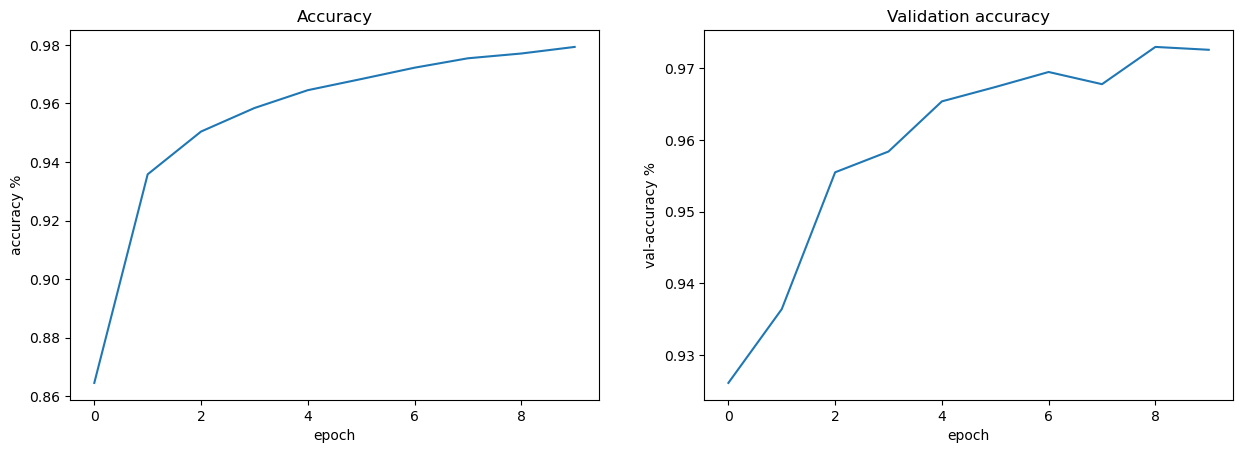

In [18]:
fig, axis = plt.subplots(1,2)
axis[0].plot(fit_info.history["accuracy"])
axis[0].set(title = "Accuracy", xlabel = "epoch", ylabel = "accuracy %")
axis[1].plot(fit_info.history["val_accuracy"])
axis[1].set(title = "Validation accuracy", xlabel = "epoch", ylabel = "val-accuracy %")
fig.set_figwidth(15)

In [23]:
epochs = 40
l2values = np.linspace(0.000001,0.001,5)
scores = {}

for i in range(5):
    scores[l2values[i]] = []
    
    for _ in range(3):    
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2values[i])))
        model.add(Dense(300, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2values[i])))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,
        validation_data=(x_test, y_test))
        scores[l2values[i]].append(model.evaluate(x_test, y_test, verbose=0))

2022-12-20 11:07:57.538150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:08:03.956555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:12:39.023215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:12:45.260607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:16:36.402292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:16:40.893964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 11:19:53.763393: I tensorflow/core/grappler/optimizers/cust

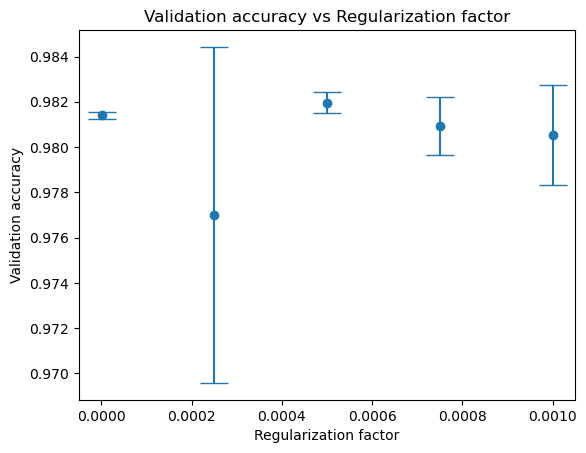

Maximum validation accuracy:  0.9826000332832336
Difference of above from Hinton's accuracy:  0.002099966716766377


In [44]:
max_acc = 0
mean = []
std = []

for k in scores:
    tmp = []
    for v in scores[k]:
        tmp.append(v[1])
    mean.append(np.mean(tmp))
    std.append(np.std(tmp))
    max_acc = max(max_acc, np.max(tmp))

plt.scatter(l2values, mean)
plt.xlabel("Regularization factor")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy vs Regularization factor")

plt.errorbar(l2values, mean, std, linestyle='None', capsize=10)
plt.show()

print("Maximum validation accuracy: ", max_acc)
print("Difference of above from Hinton's accuracy: ", 0.9847-max_acc)

### Comparison with Hinton's results
The following factors might be the reason as to why the accuracy is a bit lesser than Hinton's. 

1. Number of epochs and learning rate has not been mentioned and this can have a considerable effect on the accuracy of the model 
2. Although Hinton states the use of weight decay he does not mention the exact regularization factor being used. 

## Convolutional layers

1. Two pair convolution subsampling gave better efficiency. 
2. MaxPooling2D layer is used to downsample the data by taking the maximum value of a 3x3 matrix. 
3. Dropout has been added to avoid overfitting by randomly setting inputs to 0.

In [58]:
epochs = 10
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
model.save("best_model")

2022-12-20 22:02:13.682313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-20 22:02:26.497626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.026805078610777855, Test accuracy 0.9908000230789185


INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


### Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application? 

Convolution layers help in finding patterns in the data even if the pattern might occur in different points of the image/data. Thus it avoid overfitting and recognizes the actual patterns in the image. It is much faster since the weights are shared and performant since we're sub sampling the image into a less resoltion version without removing important parts of the image. 

## Auto-Encoder for denoising
### Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved

The salt_and_pepper function adds noise to data randomly setting bit to 1 or 0. This is applied to the training and testing dataset. 

The model tries to compresses the image from 784 to 128 bits and then further compressed to 96 bits before trying to decompress to original size of first 128 then back to 784 bits. The model is run on the original image thus trying to get an accurate deconstruction of the image. 

Denoising is acheived since the model is now able to accurately reduce dimensionlaity of the image without losing important patterns of the image and thus now the model can be used to fit the patterns as opposed to overfitting along with the noise in the data. A noisy image going through the autoencoder will generate a denoised image without losing the most important patterns of the image. 

### Explain the role of the loss function? 

The loss function used is binary crossentropy since we're dealing with binary input and outputs. The loss function is there to find the difference between the decode image and the original image so that the model tries to get a better decode image which accurately reflects the original image thus reducing loss during image construction. 

### Draw a diagram of the model 

![Autoencoder model](autoencoder_schema.jpg)

In [12]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [13]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [52]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                verbose=0,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


### Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). Visualize  a  few  examples  (3-4)  in  the  original,  “seasoned”  (noisy),  and denoised versions 

Noise = 0.0


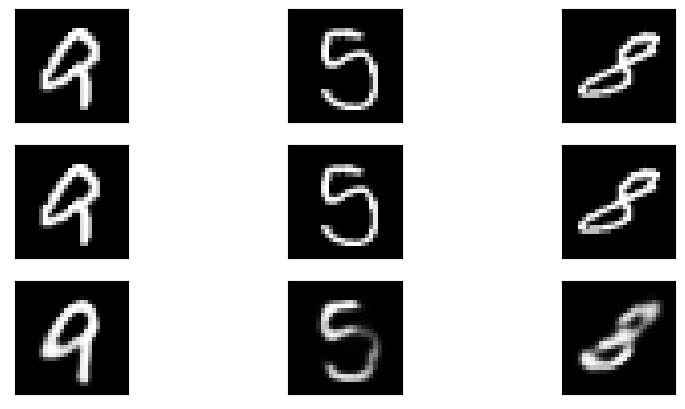

Noise = 0.2


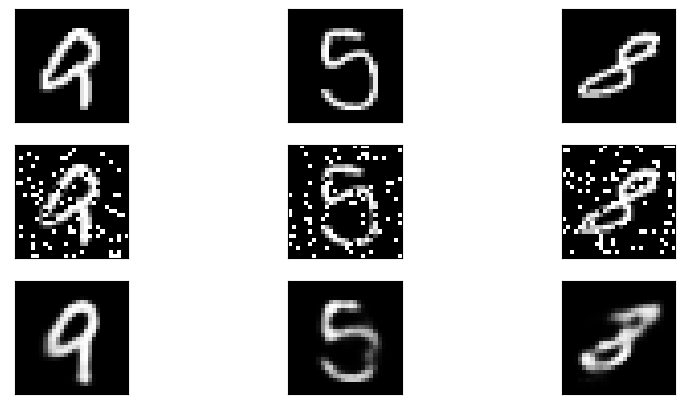

Noise = 0.4


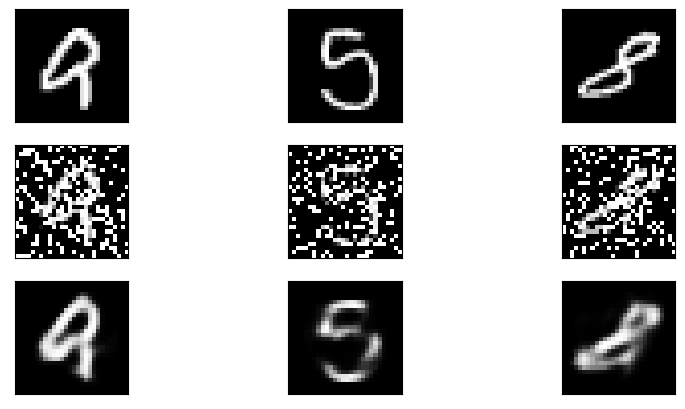

Noise = 0.6000000000000001


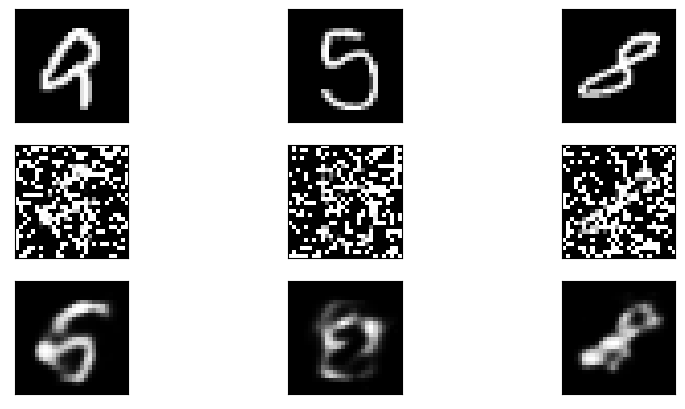

Noise = 0.8


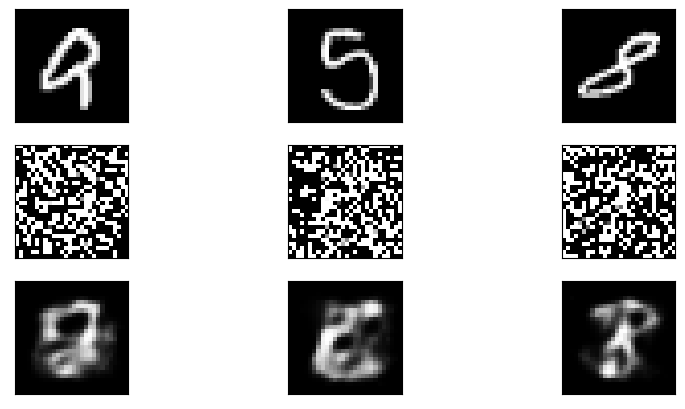

Noise = 1.0


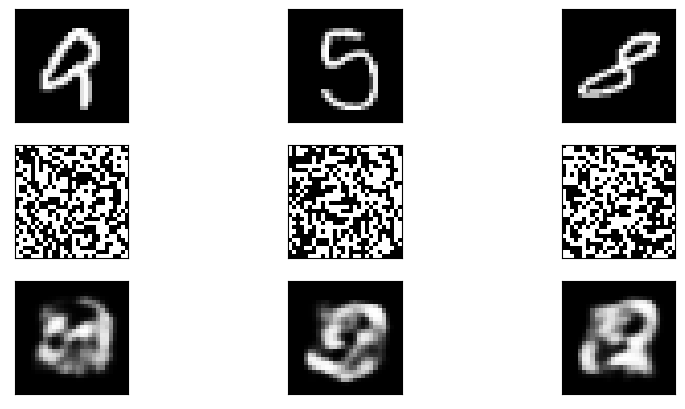

In [66]:
noise = np.linspace(0, 1, 6) 
index = random.randint(0, len(flattened_x_test)-3)

for i in range (6):
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise[i])
    denoised_images = autoencoder.predict(flattened_x_test_seasoneed, verbose=0)

    n = 3
    plt.figure(figsize=(10, 5))
    print("Noise = " + str(noise[i]))

    for j in range(n):
        ax = plt.subplot(3, n, j + 1)
        plt.imshow(x_test[index + j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, j + 1 + n)
        plt.imshow(flattened_x_test_seasoneed[index + j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, j + 1 + 2*n)
        plt.imshow(denoised_images[index + j].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

### At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working?

At 0.6 it becomes hard for me identify the digits at the same noise level denoising stops working.

### Test whether denoising improves the classification with the best performing model. Plot the true-positive rate as a function of noise-level for the seasoned and denoised datasets

In [60]:
best_model = keras.models.load_model("best_model", compile = True)

denoised_scores = []
seasoned_scores = []
for i in range (len(noise)):
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise[i])
    denoised_images = autoencoder.predict(flattened_x_test_seasoneed, verbose=0)
    denoised_images_reshaped = denoised_images.reshape(len(denoised_images), 28, 28, 1)
    x_test_seasoneed = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)

    denoised_scores.append(best_model.evaluate(denoised_images_reshaped, y_test, verbose=0)[1])
    seasoned_scores.append(best_model.evaluate(x_test_seasoneed, y_test, verbose=0)[1])


2022-12-20 22:11:22.914684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


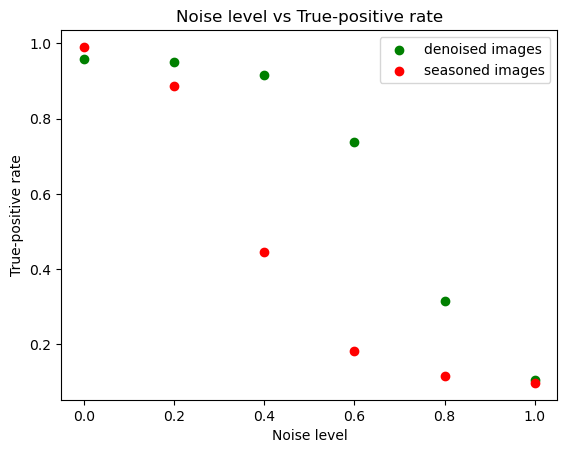

In [64]:
plt.scatter(noise, denoised_scores, color='green', label = 'denoised images')
plt.scatter(noise, seasoned_scores, color='red', label = 'seasoned images')
plt.xlabel("Noise level")
plt.ylabel("True-positive rate")
plt.title("Noise level vs True-positive rate")
plt.legend()
plt.show()

As noise increased, the model run on the denoised images produced better the positive rate than the seasoned images and this is as expected as you hope the denoised images have actually removed the noise from the images. 

### Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic “hand-written” digits?

The decoder basically decompresses the image of smaller dimensions to one of larger dimensions whilst ensuring the integrity of the image remains. Thus this can be used to generate synthetic hand written digits by adding some random noise to the compressed image such that the decoder will now generate a new image. This can be repeated multiple times to generate synthetic digits with slight variations based on the random noise added to the image. Examples of this can be seen above in the autoencoding part and denoised images can be considered a synthetic hand-written digit.
